In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pizza_sales.csv")
df_original = df.copy()

In [3]:
continua = 'total_price'
discreta = 'quantity'

# Davi

1) Grafique o boxplot para cada variável

a) Para a variável contínua:

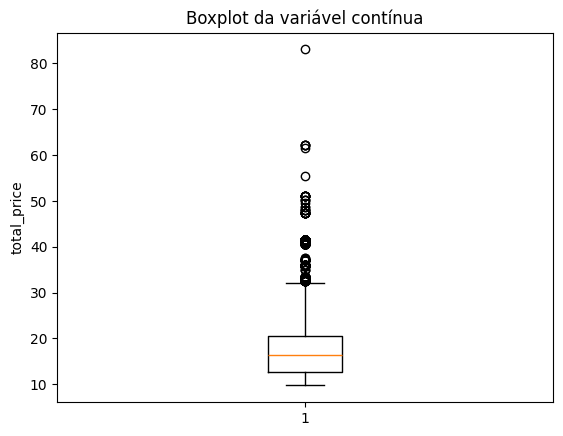

In [84]:
plt.boxplot(df[continua])
plt.title("Boxplot da variável contínua")
plt.ylabel(continua)
plt.show()

b) Para a variável discreta:

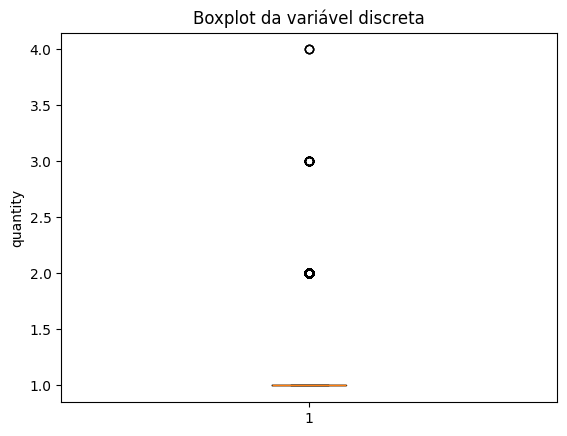

In [85]:
plt.boxplot(df[discreta])
plt.title("Boxplot da variável discreta")
plt.ylabel(discreta)
plt.show()

5) Calcule as principais métricas das medidas de resumo de centralidade, posição e dispersão usando a função 'dataframe.describe()' do pandas, para cada uma das variáveis usadas antes e depois da detecção, remoção e imputação de outliers. O que pode ser concluído a respeito?

In [86]:
continua_antes = df_original.describe()[continua]
discreta_antes = df_original.describe()[discreta]
print(continua_antes)
print(discreta_antes)

continua_depois = df.describe()[continua]
discreta_depois = df.describe()[discreta]
print(continua_depois)
print(discreta_depois)

count    48620.000000
mean        16.821474
std          4.437398
min          9.750000
25%         12.750000
50%         16.500000
75%         20.500000
max         83.000000
Name: total_price, dtype: float64
count    48620.000000
mean         1.019622
std          0.143077
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: quantity, dtype: float64


# Eugênio

In [4]:
c = continua
df[c].describe()

count    48620.000000
mean        16.821474
std          4.437398
min          9.750000
25%         12.750000
50%         16.500000
75%         20.500000
max         83.000000
Name: total_price, dtype: float64

In [5]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1
lim_sup = Q3 + 1.5 * IQR
extrem_sup = Q3 + 3 * IQR
lim_inf = Q1 - 1.5 * IQR
extrem_inf = Q1 - 3 * IQR

outliers_moderados = df[((df[c] > lim_sup) & (df[c] <= extrem_sup)) 
                        | ((df[c] < lim_inf) & (df[c] >= extrem_inf))]

print(" bigode inferior: %.2f\n extremo inferior: %.2f\n bigode superior: %.2f\n extremo superior: %.2f"%(lim_inf, extrem_inf,lim_sup,extrem_sup))

print(df[c].shape)
print(outliers_moderados[c].shape)
print("\nOutliers moderados:\n")
print(outliers_moderados[c].sort_values(ascending=False).reset_index().head())
print("\n")

outliers_extremos = df[(df[c] > extrem_sup) | (df[c] < extrem_inf)]

print(outliers_extremos[c].shape)
print("\nOutliers extremos:\n")
print(outliers_extremos[c].sort_values(ascending=False).reset_index().head())
print("\n\nTotal de outliers:", outliers_extremos.shape[0] + outliers_moderados.shape[0])

 bigode inferior: 1.12
 extremo inferior: -10.50
 bigode superior: 32.12
 extremo superior: 43.75
(48620,)
(578,)

Outliers moderados:

   index  total_price
0  48601         41.5
1    211         41.5
2  47427         41.5
3  47016         41.5
4  46542         41.5


(35,)

Outliers extremos:

   index  total_price
0  35496        83.00
1  18317        62.25
2    183        62.25
3  37638        62.25
4  38819        62.25


Total de outliers: 613


In [6]:
d = discreta
df[d].describe()

count    48620.000000
mean         1.019622
std          0.143077
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: quantity, dtype: float64

In [7]:
Q1 = df[d].quantile(0.25)
Q3 = df[d].quantile(0.75)
IQR = Q3 - Q1
lim_sup = Q3 + 1.5 * IQR
extrem_sup = Q3 + 3 * IQR
lim_inf = Q1 - 1.5 * IQR
extrem_inf = Q1 - 3 * IQR

outliers_moderados = df[((df[d] > lim_sup) & (df[d] <= extrem_sup)) 
                        | ((df[d] < lim_inf) & (df[d] >= extrem_inf))]

print(" bigode inferior: %.2f\n extremo inferior: %.2f\n bigode superior: %.2f\n extremo superior: %.2f"%(lim_inf, extrem_inf,lim_sup,extrem_sup))

print(df[d].shape)
print(outliers_moderados[d].shape)
print("\nOutliers moderados:\n")
print(outliers_moderados[d].sort_values(ascending=False).reset_index().head())
print("\n")

outliers_extremos = df[(df[d] > extrem_sup) | (df[d] < extrem_inf)]

print(outliers_extremos[d].shape)
print("\nOutliers extremos:\n")
print(outliers_extremos[d].sort_values(ascending=False).reset_index().head())
print("\n\nTotal de outliers:", outliers_extremos.shape[0] + outliers_moderados.shape[0])

 bigode inferior: 1.00
 extremo inferior: 1.00
 bigode superior: 1.00
 extremo superior: 1.00
(48620,)
(0,)

Outliers moderados:

Empty DataFrame
Columns: [index, quantity]
Index: []


(927,)

Outliers extremos:

   index  quantity
0  18875       4.0
1  11976       4.0
2  35496       4.0
3  16830       3.0
4    341       3.0


Total de outliers: 927


# Luiz

[2.5 pts] Utilize o método Z-Score para a detecção de outliers, considerando um Z-Score de +/- 2.5. Compare os resultados obtidos com o resultado do item anterior. 

In [8]:
import numpy as np

def detect_outliers_zscore(df, column, threshold=2.5):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores > threshold]

# Detect outliers for continuous variable
outliers_continuous = detect_outliers_zscore(df, continua)
print(f"Outliers in {continua} using Z-Score method:")
print(outliers_continuous)

# Detect outliers for discrete variable
outliers_discrete = detect_outliers_zscore(df, discreta)
print(f"\nOutliers in {discreta} using Z-Score method:")
print(outliers_discrete)


Outliers in total_price using Z-Score method:
       pizza_id  order_id   pizza_name_id  quantity  order_date order_time  \
48         49.0      17.0  mediterraneo_m       2.0    1/1/2015   13:53:00   
183       184.0      78.0    spicy_ital_l       3.0    2/1/2015   12:28:14   
211       212.0      91.0       bbq_ckn_l       2.0    2/1/2015   15:14:43   
222       223.0      92.0     the_greek_m       2.0    2/1/2015   15:17:02   
341       342.0     144.0       bbq_ckn_m       3.0    3/1/2015   13:44:28   
...         ...       ...             ...       ...         ...        ...   
48417   48418.0   21260.0    prsc_argla_m       2.0  30-12-2015   15:45:32   
48454   48455.0   21281.0     pepperoni_l       2.0  31-12-2015   12:01:03   
48466   48467.0   21288.0   classic_dlx_m       3.0  31-12-2015   13:04:18   
48575   48576.0   21331.0       bbq_ckn_l       2.0  31-12-2015   19:05:04   
48601   48602.0   21343.0    spicy_ital_l       2.0  31-12-2015   20:27:23   

       unit_price